# Data Science Unit 1 Sprint Challenge 1

## Loading, cleaning, visualizing, and analyzing data

In this sprint challenge you will look at a dataset of the survival of patients who underwent surgery for breast cancer.

http://archive.ics.uci.edu/ml/datasets/Haberman%27s+Survival

Data Set Information:
The dataset contains cases from a study that was conducted between 1958 and 1970 at the University of Chicago's Billings Hospital on the survival of patients who had undergone surgery for breast cancer.

Attribute Information:
1. Age of patient at time of operation (numerical)
2. Patient's year of operation (year - 1900, numerical)
3. Number of positive axillary nodes detected (numerical)
4. Survival status (class attribute)
-- 1 = the patient survived 5 years or longer
-- 2 = the patient died within 5 year

Sprint challenges are evaluated based on satisfactory completion of each part. It is suggested you work through it in order, getting each aspect reasonably working, before trying to deeply explore, iterate, or refine any given step. Once you get to the end, if you want to go back and improve things, go for it!

## Part 0 - Revert your version of Pandas right from the start
I don't want any of you to get stuck because of Pandas bugs, so right from the get-go revert back to version `0.23.4`
- Run the cell below
- Then restart your runtime. Go to `Runtime`  ->  `Restart runtime...` in the top menu (or click the "RESTART RUNTIME" button that shows up in the output of the cell below).


In [2]:
!pip install pandas==0.23.4

     |████████████████████████████████| 8.9MB 5.8MB/s 
ERROR: google-colab 1.0.0 has requirement pandas~=0.24.0, but you'll have pandas 0.23.4 which is incompatible.
  Found existing installation: pandas 0.24.2
    Uninstalling pandas-0.24.2:
      Successfully uninstalled pandas-0.24.2


In [0]:
#checked pandas version.
!pip freeze

## Part 1 - Load and validate the data

- Load the data as a `pandas` data frame.
- Validate that it has the appropriate number of observations (you can check the raw file, and also read the dataset description from UCI).
- Validate that you have no missing values.
- Add informative names to the features.
- The survival variable is encoded as 1 for surviving >5 years and 2 for not - change this to be 0 for not surviving and 1 for surviving >5 years (0/1 is a more traditional encoding of binary variables)

At the end, print the first five rows of the dataset to demonstrate the above.

In [4]:
# According to information about the data it is not missing nay values. 
import numpy as np
import pandas as pd

column_headers = ['age', 'year_operation', 'positive_nodes', 'survival_status']

df_url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/haberman/haberman.data'
df = pd.read_csv(df_url, names = column_headers)
df_backup = df

#7. Attribute Information:
#   1. Age of patient at time of operation (numerical)
#   2. Patient's year of operation (year - 1900, numerical)
#   3. Number of positive axillary nodes detected (numerical)
#   4. Survival status (class attribute)
#         1 = the patient survived 5 years or longer
#         2 = the patient died within 5 year
print(df.shape)
print(df.isnull().sum())
df.head()

(306, 4)
age                0
year_operation     0
positive_nodes     0
survival_status    0
dtype: int64


,age,year_operation,positive_nodes,survival_status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


## Part 2 - Examine the distribution and relationships of the features

Explore the data - create at least *2* tables (can be summary statistics or crosstabulations) and *2* plots illustrating the nature of the data.

This is open-ended, so to remind - first *complete* this task as a baseline, then go on to the remaining sections, and *then* as time allows revisit and explore further.

Hint - you may need to bin some variables depending on your chosen tables/plots.

In [0]:
bins_age = pd.cut(df['age'], 10)
#bins_year = pd.cut(df['year_operation'], 4)
bins_positive = pd.cut(df['positive_nodes'], 5)
bins_survival = pd.cut(df['survival_status'], 2)

binned_age_to_survival

 survival_status         1         2
age                                
(29.947, 35.3]   0.062222  0.024691
(35.3, 40.6]     0.111111  0.024691
(40.6, 45.9]     0.137778  0.185185
(45.9, 51.2]     0.164444  0.197531
(51.2, 56.5]     0.164444  0.222222
(56.5, 61.8]     0.142222  0.111111
(61.8, 67.1]     0.128889  0.148148
(67.1, 72.4]     0.062222  0.049383
(72.4, 77.7]     0.026667  0.012346
(77.7, 83.0]     0.000000  0.024691 



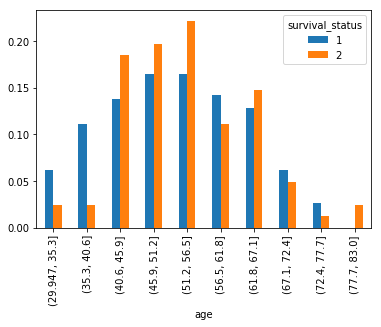

In [100]:
binned_age_to_survival = pd.crosstab(bins_age, df['survival_status'], normalize='columns')
print('binned_age_to_survival\n\n',binned_age_to_survival,'\n')
binned_age_to_survival.plot(kind='bar');

In [46]:
bins_age_to_bins_positive = pd.crosstab(bins_age, bins_positive, normalize='columns')
bins_age_to_bins_positive

positive_nodes,"(-0.052, 10.4]","(10.4, 20.8]","(20.8, 31.2]","(31.2, 41.6]","(41.6, 52.0]"
age,,,,,
"(29.947, 35.3]",0.052632,0.038462,0.090909,0.0,0.0
"(35.3, 40.6]",0.090226,0.076923,0.090909,0.0,0.0
"(40.6, 45.9]",0.146617,0.192308,0.090909,0.0,0.5
"(45.9, 51.2]",0.172932,0.230769,0.090909,0.0,0.0
"(51.2, 56.5]",0.172932,0.192308,0.272727,0.0,0.5
"(56.5, 61.8]",0.139098,0.076923,0.090909,1.0,0.0
"(61.8, 67.1]",0.127820,0.153846,0.272727,0.0,0.0
"(67.1, 72.4]",0.063910,0.038462,0.000000,0.0,0.0
"(72.4, 77.7]",0.026316,0.000000,0.000000,0.0,0.0


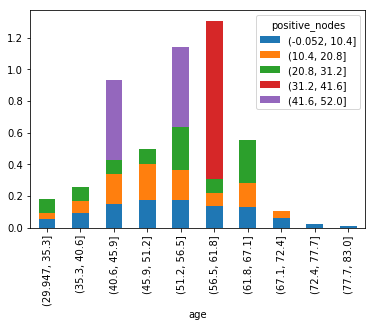

In [47]:
bins_age_to_bins_positive.plot(kind='bar', stacked=True);

## Part 3 - DataFrame Filtering

Use DataFrame filtering to subset the data into two smaller dataframes. You should make one dataframe for individuals who survived >5 years and a second dataframe for individuals who did not. 

Create a graph with each of the dataframes (can be the same graph type) to show the differences in Age and Number of Positive Axillary Nodes Detected between the two groups.

In [61]:
is_1 = (df['survival_status'] == 1)
is_2 = (df['survival_status'] == 2)
df_is_1 = df[is_1]
df_is_2 = df[is_2]
df_is_2.head()

,age,year_operation,positive_nodes,survival_status
7,34,59,0,2
8,34,66,9,2
24,38,69,21,2
34,39,66,0,2
43,41,60,23,2


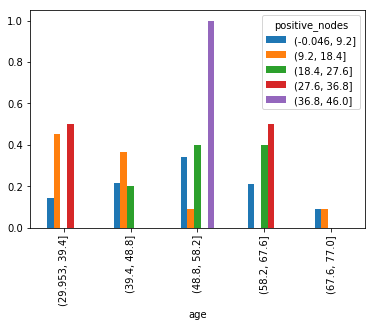

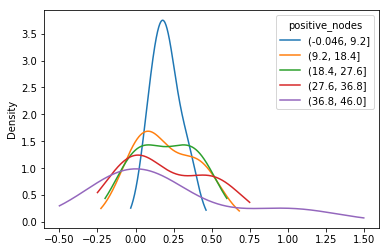

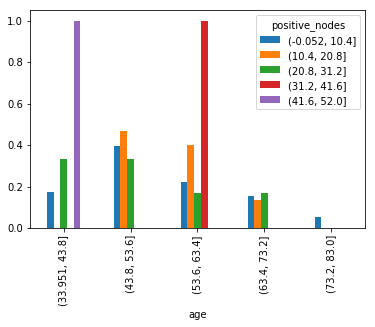

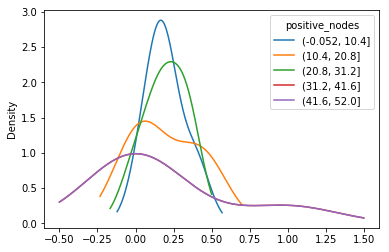

In [98]:
#bins for survived more than 5 years
bins_age_is_1 = pd.cut(df_is_1['age'], 5)
bins_positive_is_1 = pd.cut(df_is_1['positive_nodes'], 5)
is_1_cross = pd.crosstab(bins_age_is_1, bins_positive_is_1, normalize='columns')
is_1_cross.plot(kind='bar', stacked=False);

is_1_cross.plot.density();


#bins for survived less than 5 years
bins_age_is_2 = pd.cut(df_is_2['age'], 5)
bins_positive_is_2 = pd.cut(df_is_2['positive_nodes'], 5)
is_2_cross = pd.crosstab(bins_age_is_2, bins_positive_is_2, normalize='columns')
is_2_cross.plot(kind='bar',stacked=False);


is_2_cross.plot.density();

## Part 4 - Analysis and Interpretation

Now that you've looked at the data, answer the following questions:

**- What is at least one feature that looks to have a positive relationship with survival? (As that feature goes up in value rate of survival increases)**

    Age is a factor that has a positive relationship with survival until it has a negative effect after a certain point. I could see this relationship with the second part.

**- What is at least one feature that looks to have a negative relationship with survival? (As that feature goes down in value rate of survival increases)**

    The number of positive nodes had a negative realtionshop with survival. As the number of nodes went up so did survival rate. I obserbed this relation in part 3 when comparing the two graphs.

**- How are those two features related with each other, and what might that mean?**

    Age and the number of positive nodes had a big effect on survival. Age had an interesting effect towards the lower and the higher because it would affect survival the least. I observed this in part 2. While the number of nodes affected survival in an almost linear way. I observed this in part 3.

Answer with text, but feel free to intersperse example code/results or refer to it from earlier.

Supplemental information for the first quetion 




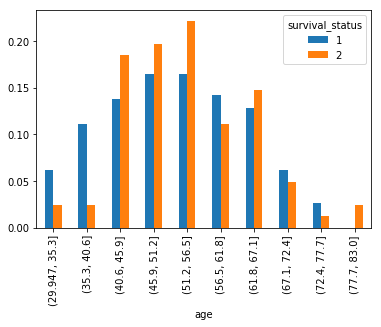

In [104]:
print('Supplemental information for the first quetion \n\n')

binned_age_to_survival.plot(kind='bar');

Supplemental information for the second quetion 




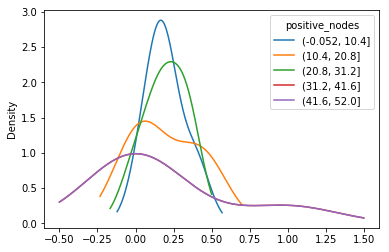

In [105]:
print('Supplemental information for the second quetion \n\n')

is_2_cross.plot.density();

Supplemental information for the third quetion 




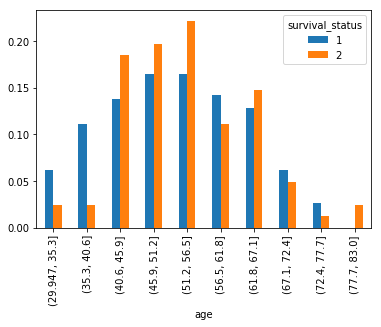

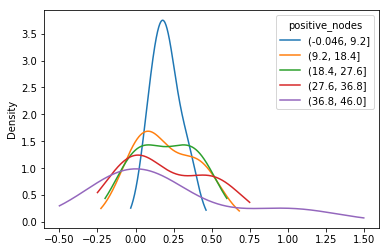

In [106]:
print('Supplemental information for the third quetion \n\n')

binned_age_to_survival.plot(kind='bar');

is_1_cross.plot.density();